# **SPOTIFY-LIKE PREDICTION MODEL**

 **OBJECTIVE OF THE STUDY**       
1.Classification using different Machine Learning Algorithms                                                                   
2.Comparing the performance of Classification techniques based on Accuracy


**ABOUT THE DATASET**  
This dataset includes a wide range of attributes relating to songs that have been liked and disliked on Spotify.     

1.**danceability**: value in range of 0.0 which is least danceable to 1.0 which is most danceable.  

2.**energy**: It measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

3.**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation.  

4.**loudness**: The overall loudness of a track in decibels(dB).Values typical range between -60 dB and 0 dB.  

5.**mode**: It indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.    

6.**speechiness**: Speechiness detects the presence of spoken words in a track. The value near 1.0 indicates talks-show, poetry and audi book. Value above 0.66 indicates tracks made entirely of spoken words.Values between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent non-speech-like tracks.  

7.**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.  

8.**instrumentalness**: Predicts whether a track contains no vocals.“Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.  

9.**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.  

10.**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

11.**tempo**: The overall estimated tempo of a track in beats per minute (BPM).   

12.**duration_ms**: The duration of the track in milliseconds.  

13.**time_signature**: The time signature is a notational convention to specify how many beats are in each bar.  

14.**liked**: 1 for liked songs , 0 for disliked songs


In [97]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**IMPORT LIBRARIES**

In [99]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2
from xgboost import XGBClassifier
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score



**IMPORT DATASET**

In [100]:
df=pd.read_csv('/Users/kagantimur/Desktop/Spotify Predictive Model/spotify.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.628,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.519,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,NaN,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.582,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.647,155.117,179413,4,1


**DATA PREPROCESSING**

In [101]:
#Checking for missing values
df.isna().sum()

danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          5
acousticness         0
instrumentalness     0
liveness             0
valence             13
tempo                0
duration_ms          0
time_signature       0
liked                0
dtype: int64

In [102]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
liked                 int64
dtype: object

**MISSING VALUE HANDLING**

In [103]:
# Filling the missing values with the mean of the column
columns_to_fill = ['speechiness', 'valence']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

In [104]:
# Checking for missing values
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [105]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

In [106]:
# Iterate through each column and identify outliers using IQR
for column in df.columns:
    if df[column].dtype == 'float64':  # Only consider numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f'Outliers in {column}:\n{outliers}\n')

Outliers in danceability:
Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, liked]
Index: []

Outliers in energy:
     danceability   energy  key  loudness  mode  speechiness  acousticness   
2           0.261  0.01490    1   -27.528     1       0.0419         0.992  \
35          0.307  0.05150    4   -28.493     0       0.0324         0.708   
48          0.267  0.00240    1   -42.261     0       0.0531         0.995   
58          0.364  0.00799    8   -33.090     1       0.0395         0.978   
62          0.318  0.06330    6   -23.869     1       0.0507         0.992   
110         0.379  0.07500    0   -20.328     1       0.0408         0.992   
129         0.213  0.06560    7   -24.810     1       0.0467         0.992   
135         0.230  0.04870    5   -27.675     1       0.0412         0.986   
138         0.334  0.00732    4   -30.908     0       0.0355     

- In this case, the diverse energy levels in different types of music are likely a valuable feature rather than a problem.

**EXPLORATORY DATA ANALYSIS**

[Text(0.5, 1.0, 'ENERGY VS LIKED')]

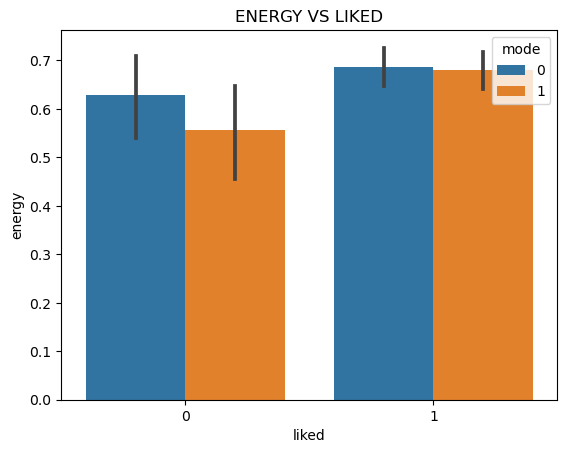

In [107]:
# ENERGY VS LIKED
sns.barplot(x='liked',y='energy',data=df,hue='mode').set(title='ENERGY VS LIKED')

The songs having high energy is liked by more people than songs having lower energy. Mode 0 has slightly high energy than mode 1 for both the liked and disliked songs

[Text(0.5, 1.0, 'DURATION_MS VS LIKED')]

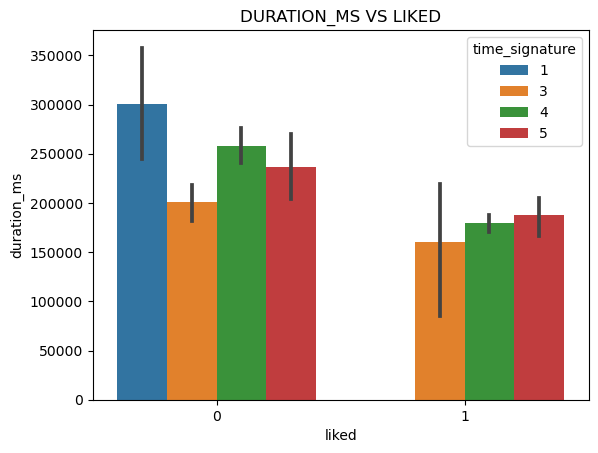

In [108]:
#DURATION_MS VS LIKED
sns.barplot(x='liked',y='duration_ms',data=df,hue='time_signature').set(title='DURATION_MS VS LIKED')

The songs which are liked are having lower time duration for all time_signatures

In [109]:
df['liked'].value_counts()

liked
1    100
0     95
Name: count, dtype: int64

<Axes: xlabel='liked', ylabel='count'>

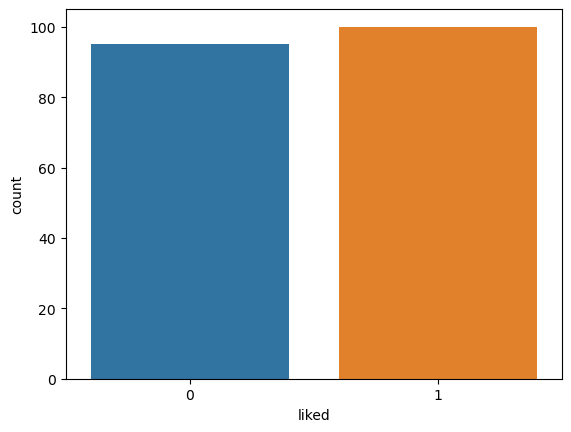

In [110]:
sns.countplot(x='liked',data=df)

**SEPERATE X AND Y**

In [111]:
#Seperating input and output variables
X=df.iloc[:,:-1]
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.628000,95.968,304524,4
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.519000,151.329,247178,4
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.164846,75.296,286987,4
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.582000,89.860,208920,4
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.647000,155.117,179413,4


In [112]:
y=df.iloc[:,-1]
y

0      0
1      1
2      0
3      1
4      1
      ..
190    0
191    0
192    0
193    1
194    1
Name: liked, Length: 195, dtype: int64

**SCALING USING MINMAXSCALER**

In [113]:
mm=MinMaxScaler()
X_sc=mm.fit_transform(X)
X_sc

array([[0.8247549 , 0.62560386, 0.63636364, ..., 0.29864431, 0.39328212,
        0.75      ],
       [0.7745098 , 0.70511272, 0.90909091, ..., 0.76050557, 0.29406931,
        0.75      ],
       [0.16053922, 0.01258052, 0.09090909, ..., 0.12618362, 0.36294182,
        0.75      ],
       ...,
       [0.45220588, 0.35084541, 0.81818182, ..., 0.25439453, 0.27463885,
        0.75      ],
       [0.54411765, 0.73128019, 0.90909091, ..., 0.42027281, 0.19556063,
        1.        ],
       [0.75612745, 0.6678744 , 1.        , ..., 0.14462937, 0.17302469,
        0.75      ]])

**TRAIN & TEST SPLIT**

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=1)

**MODEL BUILDING AND EVALUATION**

In [115]:
#KNEIGHBORS CLASSIFICATION
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        32

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



**Precision:** The precision values for classes 0 (disliked) and 1 (liked) are shown. For class 0, the model's positive predictions are accurate 89% of the time. For class 1, its positive predictions are correct 91% of the time.

**Recall:** The recall values for both classes are displayed. Class 0's recall of 0.89 indicates that the model correctly captures 89% of actual "disliked" songs. Class 1's recall of 0.91 shows that it captures 91% of actual "liked" songs.

**F1-Score:** The F1-score values are given. These scores consider both precision and recall. For class 0, the F1-score is 0.89, and for class 1, it's 0.91. These values indicate a balanced performance between identifying positive instances and correctly capturing them.

**Accuracy:** The overall accuracy of the model's predictions is displayed. The accuracy score of 0.90 means that the model is correct for approximately 90% of instances in the test dataset.

**Macro Avg:** The macro average of precision, recall, and F1-score is provided. This average treats each class equally.

**Weighted Avg:** The weighted average of precision, recall, and F1-score is given, considering the support (number of instances) for each class.

In conclusion, the output provides a comprehensive view of the model's performance, covering its ability to identify and classify instances for each class, as well as its overall accuracy

In [116]:
#SUPPORT VECTOR CLASSIFICATION
sv=SVC(kernel='rbf')
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        32

    accuracy                           0.88        59
   macro avg       0.89      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



In [117]:
#NAIVE BAYES CLASSIFICATION
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        27
           1       0.86      1.00      0.93        32

    accuracy                           0.92        59
   macro avg       0.93      0.91      0.91        59
weighted avg       0.93      0.92      0.91        59



In [118]:
#DECISION TREE CLASSIFICATION
dt=DecisionTreeClassifier(criterion='gini',random_state=3,)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        32

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [119]:
#RANDOM FOREST CLASSIFICATION
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=dt.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        32

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [120]:
#ADABOOST CLASSIFICATION
ab=AdaBoostClassifier(random_state=1)
ab.fit(X_train,y_train)
y_pred5=ab.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        32

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [121]:
#XGBOOST CLASSIFICATION
xg=XGBClassifier(n_estimators=100)
xg.fit(X_train,y_train)
y_pred6=xg.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.91      0.97      0.94        32

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



**OVERSAMPLING**

In [122]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
y_os.value_counts()

liked
0    100
1    100
Name: count, dtype: int64

In [123]:
#SCALING AFTER OVERSAMPLING
mm1=MinMaxScaler()
X_sc1=mm1.fit_transform(X_os)
X_sc1

array([[0.8247549 , 0.62560386, 0.63636364, ..., 0.29864431, 0.39328212,
        0.75      ],
       [0.7745098 , 0.70511272, 0.90909091, ..., 0.76050557, 0.29406931,
        0.75      ],
       [0.16053922, 0.01258052, 0.09090909, ..., 0.12618362, 0.36294182,
        0.75      ],
       ...,
       [0.7808555 , 0.7271072 , 0.45454545, ..., 0.39615186, 0.23507206,
        0.75      ],
       [0.71791091, 0.77737001, 0.63636364, ..., 0.3565965 , 0.29132714,
        0.75      ],
       [0.28375492, 0.04664473, 0.09090909, ..., 0.0411634 , 0.28424076,
        0.5       ]])

In [124]:
#TRAIN TEST SPLIT AFTER OVERSAMPLING
X_train,X_test,y_train,y_test=train_test_split(X_sc1,y_os,test_size=0.3,random_state=1)

In [125]:
#KNEIGHBORS CLASSIFICATION AFTER OVER SAMPLING
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)
y_pred7=knn1.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.93      0.84      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



In [126]:
#HYPER PARAMETER TUNING OF KNEIGHBORS CLASSIFIER
knn2=KNeighborsClassifier()
params_knn={'n_neighbors':[5,7,9,11,13,15],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf1=GridSearchCV(knn2,params_knn,cv=5,scoring='accuracy')
clf1.fit(X_train,y_train)
clf1.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

In [127]:
#KNEIGHBORS CLASSIFICATION AFTER HYPER PARAMETER TUNING
knn3=KNeighborsClassifier(n_neighbors=7,algorithm='auto',weights='uniform')
knn3.fit(X_train,y_train)
y_pred_knn=knn3.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.93      0.84      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



In [128]:
#SUPPORT VECTOR CLASSIFICATION AFTER OVER SAMPLING
sv1=SVC(kernel='poly')
sv1.fit(X_train,y_train)
y_pred8=sv1.predict(X_test)
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.94      0.97      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [129]:
#HYPER PARAMETER TUNING OF SUPPORT VECTOR CLASSIFIER
sv2=SVC()
params_sv={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto']}
clf2=GridSearchCV(sv2,params_sv,cv=5,scoring='accuracy')
clf2.fit(X_train,y_train)
clf2.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

In [130]:
#SUPPORT VECTOR CLASSIFICATION AFTER HYPER PARAMETER TUNING
sv3=SVC(kernel='poly',gamma='scale')
sv3.fit(X_train,y_train)
y_pred_sv=sv3.predict(X_test)
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.94      0.97      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [131]:
#NAIVE BAYES CLASSIFICATION AFTER OVER SAMPLING
nb1=GaussianNB()
nb1.fit(X_train,y_train)
y_pred9=nb1.predict(X_test)
print(classification_report(y_test,y_pred9))


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.84      1.00      0.91        32

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



In [132]:
#DECISION TREE CLASSIFICATION AFTER OVER SAMPLING
dt1=DecisionTreeClassifier(criterion='gini',random_state=1)
dt1.fit(X_train,y_train)
y_pred10=dt1.predict(X_test)
print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.93      0.88      0.90        32

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [133]:
#HYPER PARAMETER TUNING OF DECISON TREE CLASSIFIER
dt2=DecisionTreeClassifier()
params_dt={'criterion':['gini','entropy'],'splitter':['best','random']}
clf3=GridSearchCV(dt2,params_dt,cv=5,scoring='accuracy')
clf3.fit(X_train,y_train)
clf3.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [134]:
#DECISION TREE CLASSIFICATION AFTER HYPER PARAMETER TUNING
dt3=DecisionTreeClassifier(criterion='entropy',splitter='best')
dt3.fit(X_train,y_train)
y_pred_dt=dt3.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.97      0.94      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [135]:
#RANDOM FOREST CLASSIFICATION AFTER OVER SAMPLING
rf1=RandomForestClassifier(n_estimators=100,random_state=1)
rf1.fit(X_train,y_train)
y_pred11=rf1.predict(X_test)
print(classification_report(y_test,y_pred11))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [136]:
#HYPER PARAMETER TUNING OF RANDOMFOREST CLASSIFIER
rf2=RandomForestClassifier()
params_rf={'n_estimators':[50,75,100,125,150],'criterion':['entropy','gini']}
clf4=GridSearchCV(rf2,params_rf,cv=5,scoring='accuracy')
clf4.fit(X_train,y_train)
clf4.best_params_

{'criterion': 'entropy', 'n_estimators': 75}

In [137]:
#RANDOM FOREST CLASSIFICATION AFTER HYPER PARAMETER TUNING
rf3=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
rf3.fit(X_train,y_train)
y_pred_rf=rf3.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [138]:
#PREDICTION USING RANDOM FOREST CLASSIFICATION
y_new1=rf3.predict(mm1.transform([[0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.628000,95.968,304524,4]]))
if y_new1==1:
  print('The Song is Liked')
else:
  print('The Song is Disliked')

The Song is Disliked


In [139]:
y_new2=rf3.predict(mm1.transform([[0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.519,151.329,247178,4]]))
if y_new2==1:
  print('The Song is Liked')
else:
  print('The Song is Disliked')

The Song is Liked


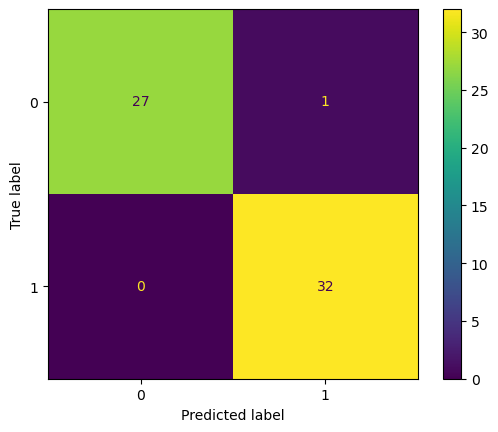

In [174]:
#CONFUSION MATRIX OF RANDOM FOREST CLASSIFICATION
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

In [141]:
#ADABOOST CLASSIFICATION AFTER OVER SAMPLING
ab1=AdaBoostClassifier(random_state=1)
ab1.fit(X_train,y_train)
y_pred12=ab1.predict(X_test)
print(classification_report(y_test,y_pred12))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.94      0.91      0.92        32

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [142]:
#HYPER PARAMETER TUNING OF ADABOOST CLASSIFIER
ab2=AdaBoostClassifier()
params_ab={'n_estimators':[50,75,100,125,150]}
clf5=GridSearchCV(ab2,params_ab,cv=5,scoring='accuracy')
clf5.fit(X_train,y_train)
clf5.best_params_

{'n_estimators': 75}

In [143]:
#ADABOOST CLASSIFICATION AFTER HYPER PARAMETER TUNING
ab3=AdaBoostClassifier(n_estimators=75,random_state=1)
ab3.fit(X_train,y_train)
y_pred_ab=ab3.predict(X_test)
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.97      0.88      0.92        32

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [144]:
#XGBOOST CLASSIFICATION AFTER OVER SAMPLING
xg1=XGBClassifier(n_estimators=75)
xg1.fit(X_train,y_train)
y_pred13=xg1.predict(X_test)
print(classification_report(y_test,y_pred13))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [145]:
#PREDICTION USING XGBOOSTCLASSIFIER
y_new1=xg1.predict(mm1.transform([[0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.628000,95.968,304524,4]]))
if y_new1==1:
  print('The Song is Liked')
else:
  print('The Song is Disliked')

The Song is Disliked


In [146]:
y_new2=xg1.predict(mm1.transform([[0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.519,151.329,247178,4]]))
if y_new2==1:
  print('The Song is Liked')
else:
  print('The Song is Disliked')

The Song is Liked


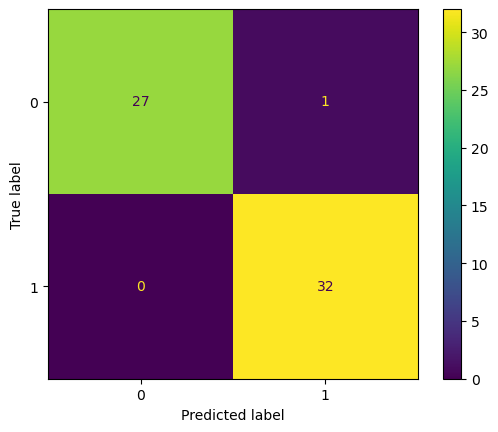

In [147]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred13))

**FEATURE EXTRACTION - PRINCIPLE COMPONENT ANALYSIS**

In [148]:
#PRINCIPLE COMPONENT ANALYSIS OF RANDOM FOREST CLASSIFICATION
pca=PCA(n_components=7)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [149]:
#RANDOM FOREST CLASSIFICATION AFTER PRINCIPLE COMPONENT ANALYSIS
rf4=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
rf4.fit(X_train,y_train)
y_pred_pca=rf4.predict(X_test)
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.91      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



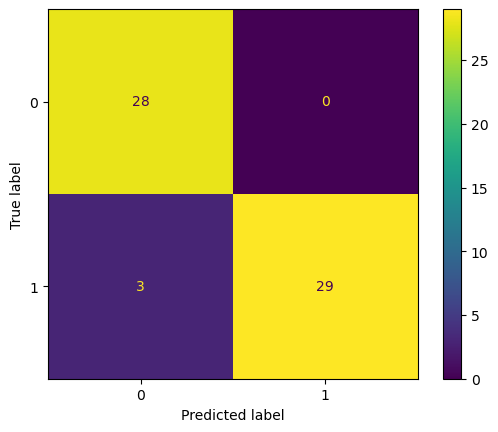

In [150]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_pca))

In [151]:
pca.explained_variance_ratio_

array([0.29235432, 0.23330621, 0.13985973, 0.10381601, 0.0621901 ,
       0.04331107, 0.033109  ])

**FEATURE SELECTION**

In [152]:
#CHI-SQUARE TEST
chi2_selector=SelectKBest(chi2,k=8)
X_kbest=chi2_selector.fit_transform(X_sc1,y_os)
X_kbest.shape

(200, 8)

In [153]:
X_kbest_indices=chi2_selector.get_support(indices=True)
print('X_kbest_indices:',X_kbest_indices)
print('selected_features:',df.columns[X_kbest_indices].tolist())

X_kbest_indices: [ 0  3  5  6  7  9 10 11]
selected_features: ['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms']


In [154]:
#Drop other features to get a new dataset
X_os.drop(['energy','mode','time_signature','key','liveness'],axis=1,inplace=True)
X_os

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0.803000,-6.764000,0.047700,0.451000,0.000734,0.628000,95.968000,304524
1,0.762000,-7.951000,0.306000,0.206000,0.000000,0.519000,151.329000,247178
2,0.261000,-27.528000,0.041900,0.992000,0.897000,0.164846,75.296000,286987
3,0.722000,-6.994000,0.058500,0.431000,0.000001,0.582000,89.860000,208920
4,0.787000,-7.516000,0.222000,0.145000,0.000000,0.647000,155.117000,179413
...,...,...,...,...,...,...,...,...
195,0.398538,-19.661890,0.072767,0.857057,0.112453,0.124000,100.426888,270383
196,0.777040,-7.706052,0.070366,0.292914,0.000029,0.124039,119.950259,247160
197,0.767178,-6.047280,0.079832,0.149038,0.213921,0.124000,107.655743,213077
198,0.715815,-8.256011,0.062476,0.091488,0.002455,0.140199,102.914440,245593


In [155]:
mm2=MinMaxScaler()
X_sc2=mm2.fit_transform(X_os,y_os)

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X_kbest,y_os,test_size=0.3,random_state=1)

In [157]:
#RANDOM FOREST CLASSIFICATION AFTER CHI-SQUARE TEST
rf5=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
rf5.fit(X_train,y_train)
y_pred_chi2=rf5.predict(X_test)
print(classification_report(y_test,y_pred_chi2))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



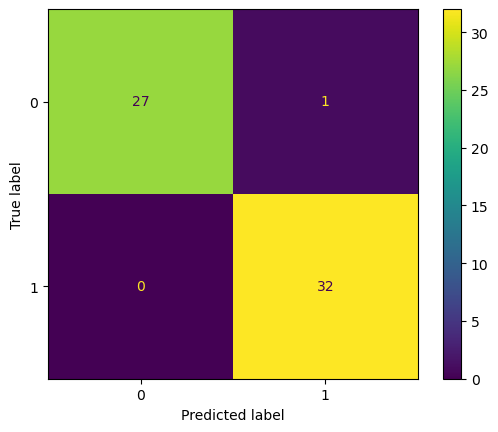

In [158]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_chi2))

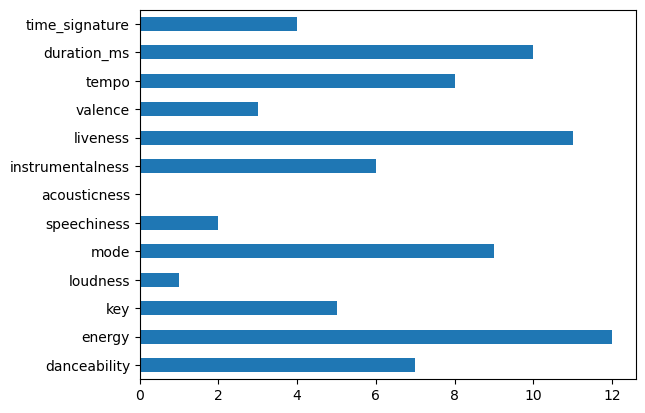

In [159]:
from sklearn.preprocessing import StandardScaler

# Convert y_os to a numpy array
y_os_np = np.array(y_os)

# Standardize the features
scaler = StandardScaler()
X_sc1 = scaler.fit_transform(X_sc1)

# FISHER'S SCORE
ranks = fisher_score.fisher_score(X_sc1, y_os_np)
feat_importance = pd.Series(ranks, df.columns[0:len(df.columns)-1])

# Convert to a numpy array before indexing
feat_importance_np = feat_importance.values

# Use the numpy array for indexing
feat_importance_plot = pd.Series(feat_importance_np, df.columns[0:len(df.columns)-1])

feat_importance_plot.plot(kind='barh')
plt.show()

**CREATING A TABLE FOR DIFFERENT ALGORITHMS**

In [160]:
dataset=pd.DataFrame({'without_oversampling':[90,88,92,93,93,90,93],'oversampling':[88,95,90,90,98,92,98],'hyper_parameter_tuning':[88,95,0,95,98,92,0]},
   index=['KNeighborsClassifier','SupportVectorClassifier','NaiveBayesClassifier','DicisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','XGBoostClassifier'])
dataset

,without_oversampling,oversampling,hyper_parameter_tuning
KNeighborsClassifier,90,88,88
SupportVectorClassifier,88,95,95
NaiveBayesClassifier,92,90,0
DicisionTreeClassifier,93,90,95
RandomForestClassifier,93,98,98
AdaBoostClassifier,90,92,92
XGBoostClassifier,93,98,0


**PLOT THE GRAPH OF ALGORITHMS VS ACCURACY**

Text(0.5, 1.0, 'ALGORITHMS VS ACCURACY')

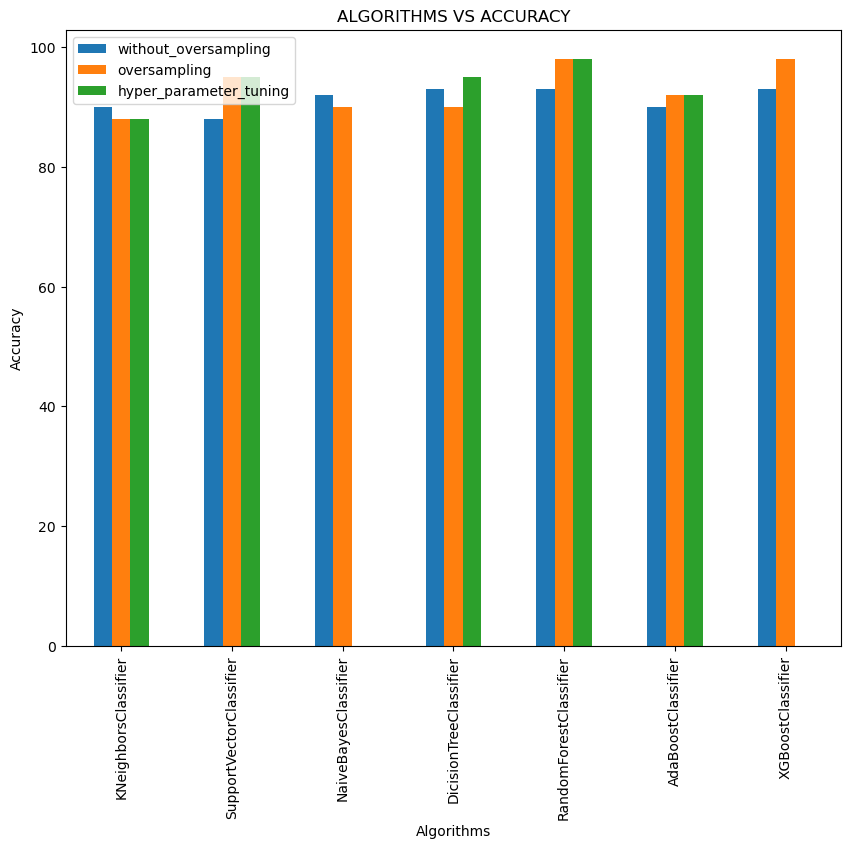

In [161]:
dataset.plot(kind='bar',figsize=(10,8))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('ALGORITHMS VS ACCURACY')


**CONCLUSION**: From the performance evaluation of different algorithms Random Forest Classification and XGBoost Classification have generated the model with higher accuracy after over sampling. After feature selection a model is created using Random Forest Classification which also gives higher accuracy.

**SAVING THE MODEL**

In [164]:
import pickle

# Specify the full path to the directory where you want to save the files
save_directory = '/Users/kagantimur/Desktop/Spotify Predictive Model'

# Save the model and scaler
with open(f'{save_directory}/spotify_model', 'wb') as model_file:
    pickle.dump(rf5, model_file)

with open(f'{save_directory}/spotify_scaler', 'wb') as scaler_file:
    pickle.dump(mm2, scaler_file)


In [170]:
import pickle

model = pickle.load(open('/Users/kagantimur/Desktop/Spotify Predictive Model/spotify_model', 'rb'))
scaler = pickle.load(open('/Users/kagantimur/Desktop/Spotify Predictive Model/spotify_scaler', 'rb'))

# These are just hypothetical values you provided for illustration purposes
y_pred_new = model.predict(scaler.transform([[0.762, -7.951, 0.306, 0.206, 0.000, 0.519, 151.329, 247178]]))

if y_pred_new == 1:
    print('The Song is Liked')
else:
    print('The Song is Disliked')

The Song is Liked
